In [23]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/D2-1'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "anndataNucD21"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_endoSplit_portalLAM.csv"

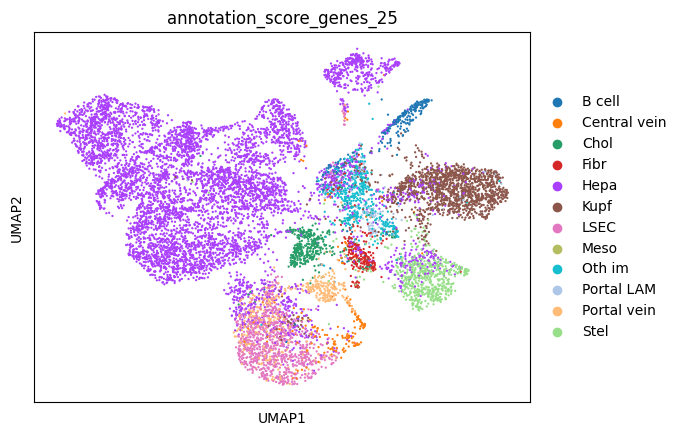

              annotation_score_genes_25
B cell                         2.331168
Central vein                   1.646054
Chol                           3.203132
Fibr                           1.993060
Hepa                          55.734496
Kupf                          12.225287
LSEC                           8.248065
Meso                           0.008898
Oth im                         3.977222
Portal LAM                     1.058813
Portal vein                    4.181867
Stel                           5.391939


In [5]:
# Original score_genes
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

Hepa            51.143340
Kupf            13.088353
LSEC            12.874811
Stel             6.664294
Oth im           4.146276
Fibr             2.784945
Chol             2.464632
B cell           2.402349
Portal vein      1.797313
Portal LAM       1.423614
Central vein     0.969837
Meso             0.160157
Unknown          0.080078
Name: annotation_own_score_genes, dtype: float64


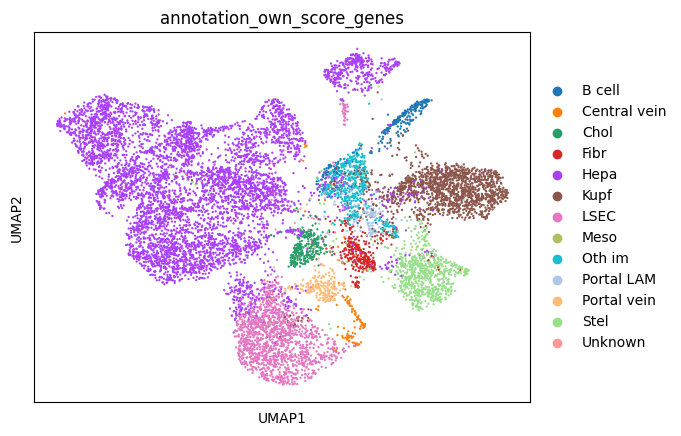

4.680131684313551


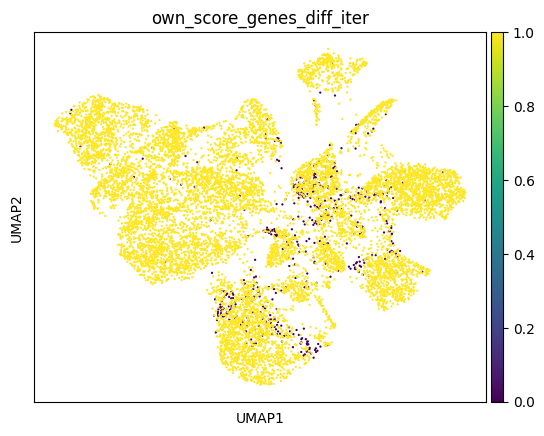

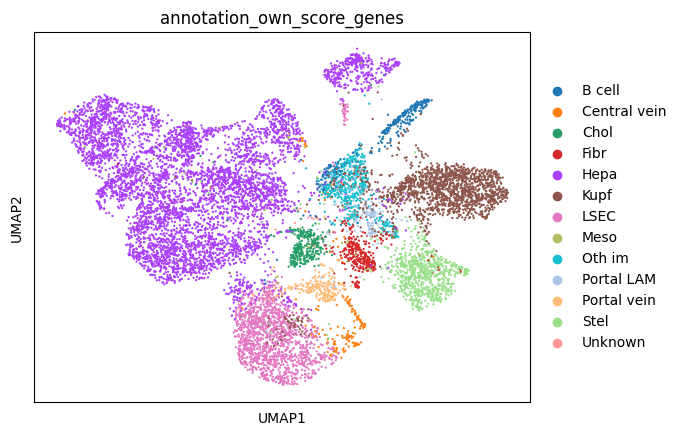

Hepa            48.758786
Kupf            14.351811
LSEC            12.403239
Stel             6.699884
Oth im           3.977222
Fibr             2.873921
Chol             2.793843
B cell           2.678174
Portal vein      1.930777
Portal LAM       1.690542
Central vein     1.485897
Meso             0.275825
Unknown          0.080078
Name: annotation_own_score_genes, dtype: float64
0.6851143340154818


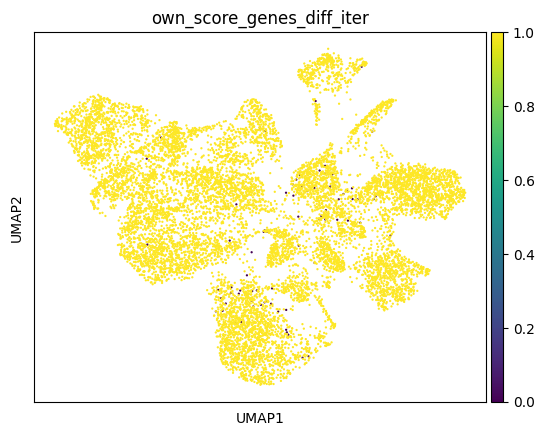

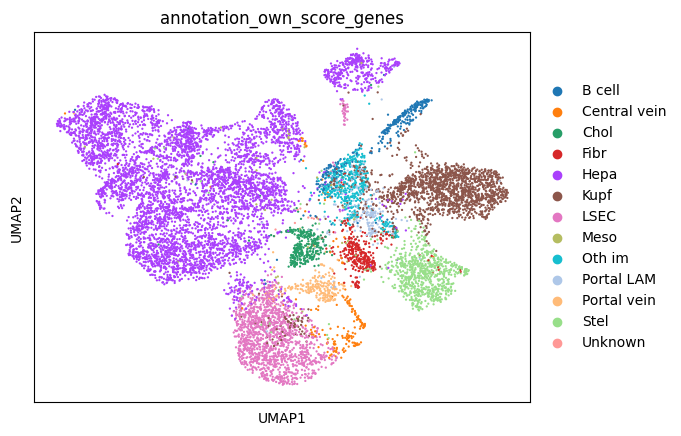

Hepa            48.393985
Kupf            14.431889
LSEC            12.421034
Stel             6.699884
Oth im           3.888246
Chol             2.865024
Fibr             2.856126
B cell           2.678174
Portal vein      1.930777
Portal LAM       1.832903
Central vein     1.592668
Meso             0.329211
Unknown          0.080078
Name: annotation_own_score_genes, dtype: float64
0.12456624254826942


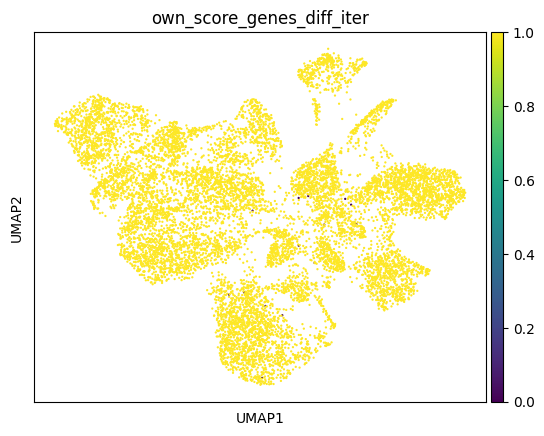

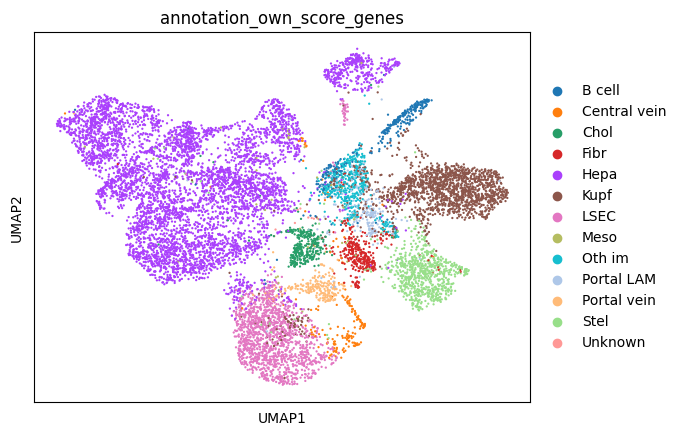

Hepa            48.331702
Kupf            14.440787
LSEC            12.447727
Stel             6.699884
Oth im           3.861554
Fibr             2.873921
Chol             2.856126
B cell           2.678174
Portal vein      1.930777
Portal LAM       1.877391
Central vein     1.592668
Meso             0.329211
Unknown          0.080078
Name: annotation_own_score_genes, dtype: float64
0.035590355013791264
converged


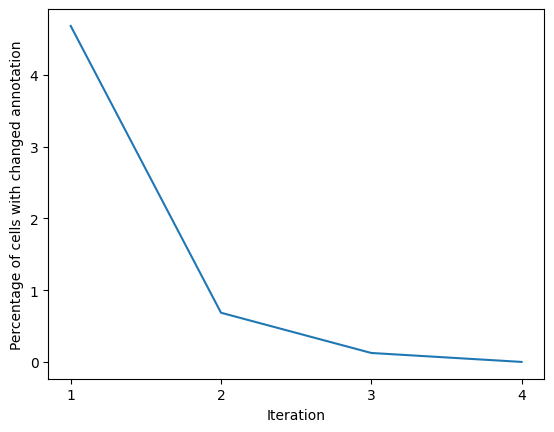

In [6]:
# Own score genes iterative
scores = own_score_genes_iterative(sdata.table,path_mg,nr_iterations=8,output_dir=OUTPUT_DIR)

Hepa             8.669
LSEC             9.333
Portal vein      6.000
Central vein     8.500
Chol             7.500
Kupf            19.500
Stel            16.001
Fibr            17.625
B cell           4.500
Meso             6.000
Portal LAM      13.500
Oth im           4.000
dtype: float64


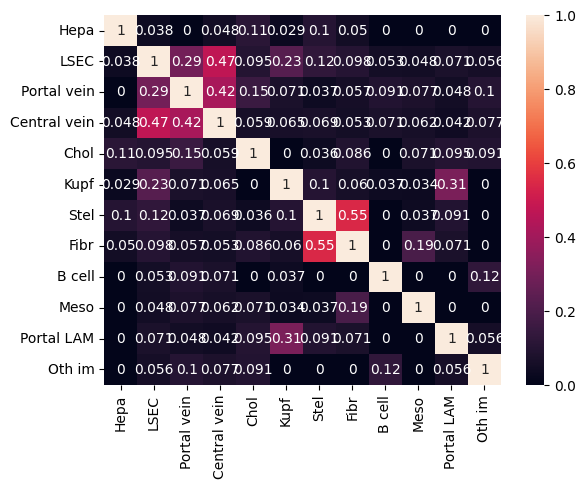

In [7]:
Jaccard_similarity_matrix(path_mg)

<AxesSubplot: >

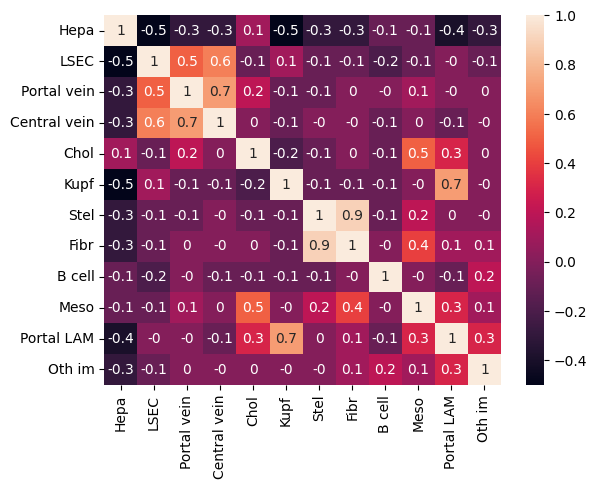

In [8]:
# plot correlation matrix of the features
sns.heatmap(np.round(scores.corr(method='pearson'),1), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

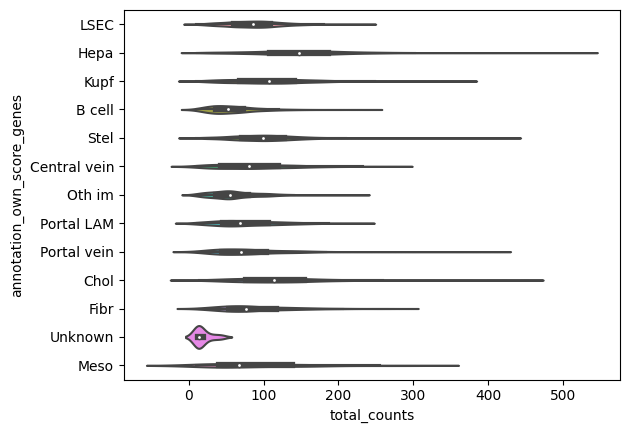

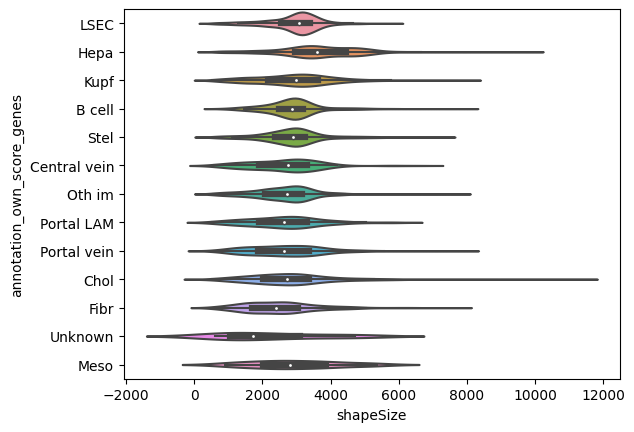

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

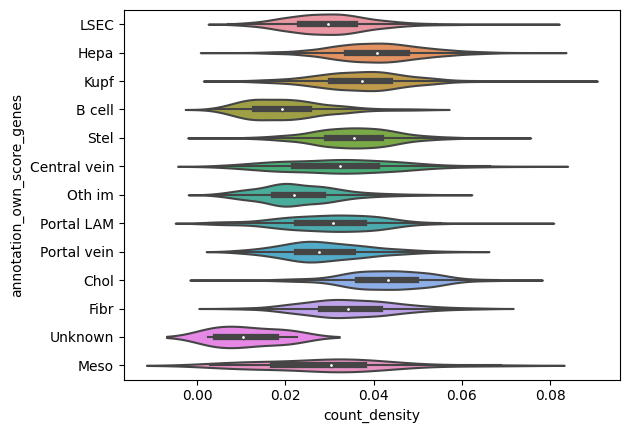

In [9]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

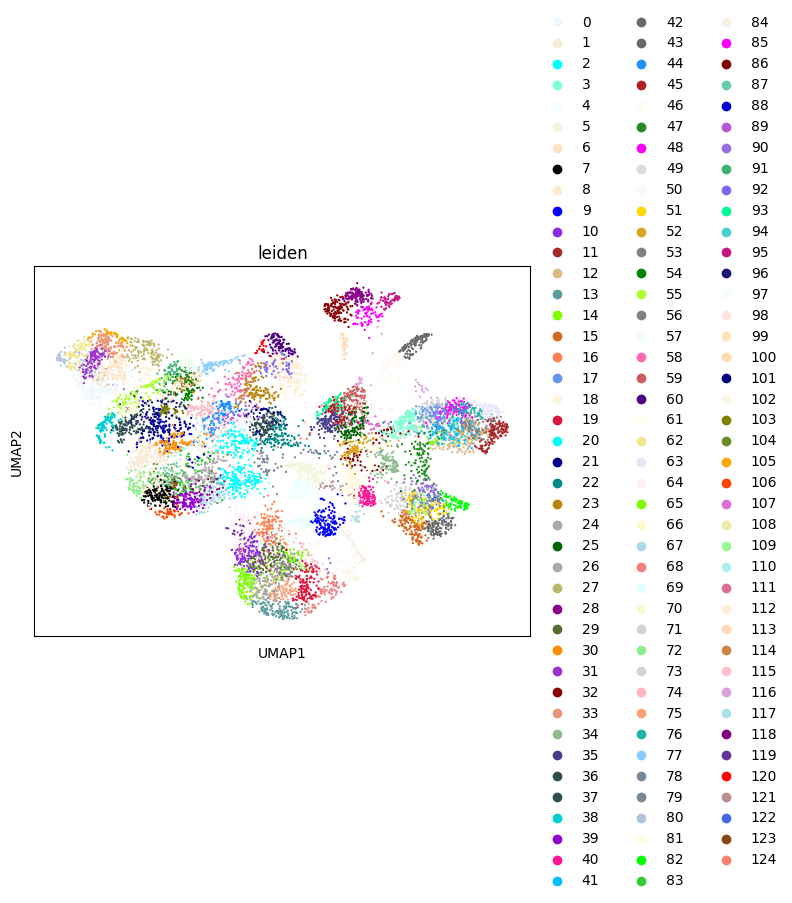

In [10]:
sc.tl.leiden(sdata.table,resolution=10,key_added='leiden')
sc.pl.umap(sdata.table,color='leiden',palette=list(matplotlib.colors.CSS4_COLORS.values()))

Index(['B cell', 'Central vein', 'Chol', 'Fibr', 'Hepa', 'Kupf', 'LSEC',
       'Meso', 'Oth im', 'Portal LAM', 'Portal vein', 'Stel', 'Unknown'],
      dtype='object')
Hepa
[0, 1, 2, 6, 7, 8, 20, 21, 22, 23, 26, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 44, 49, 50, 54, 55, 57, 58, 60, 62, 64, 67, 70, 72, 74, 77, 80, 81, 83, 85, 87, 88, 89, 91, 92, 95, 96, 99, 100, 101, 103, 104, 105, 106, 110, 112, 114, 118, 120, 123, 124]
Kupf
[3, 11, 12, 17, 41, 47, 48, 56, 63, 65, 73, 76, 86, 94, 98, 108, 116]
LSEC
[10, 13, 14, 16, 19, 24, 29, 53, 66, 68, 75, 97, 111, 113, 115, 119]
Central vein
[84, 102]
Portal vein
[9, 69]
Fibr
[18, 40, 117, 121]
Stel
[15, 42, 51, 71, 78, 82, 90, 109, 122]
Meso
[]
Chol
[4, 5]
B cell
[43, 46, 93]
Oth im
[25, 45, 59]
Unknown
[34, 35, 52, 79, 107]
Portal LAM
[61]


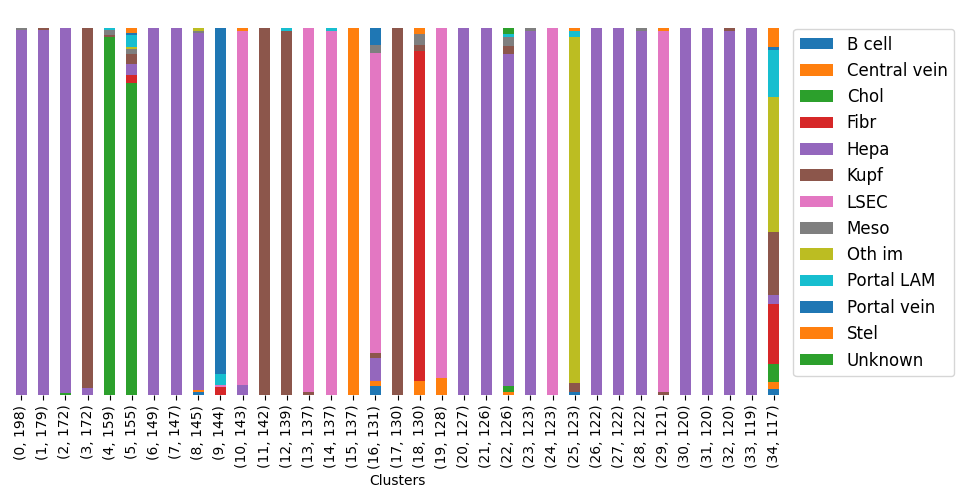

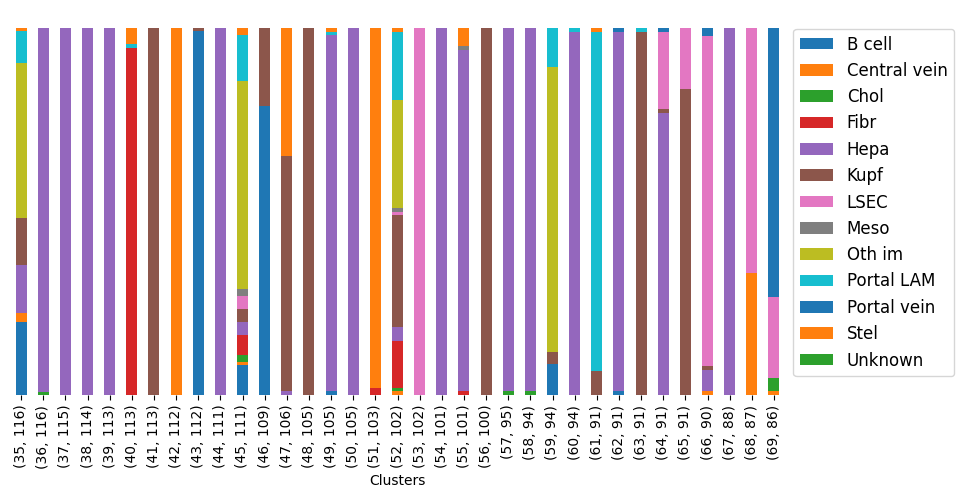

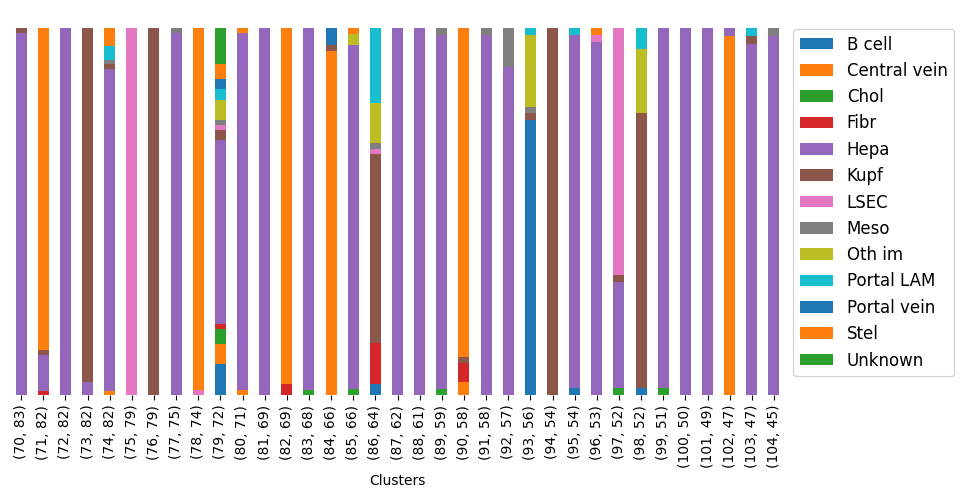

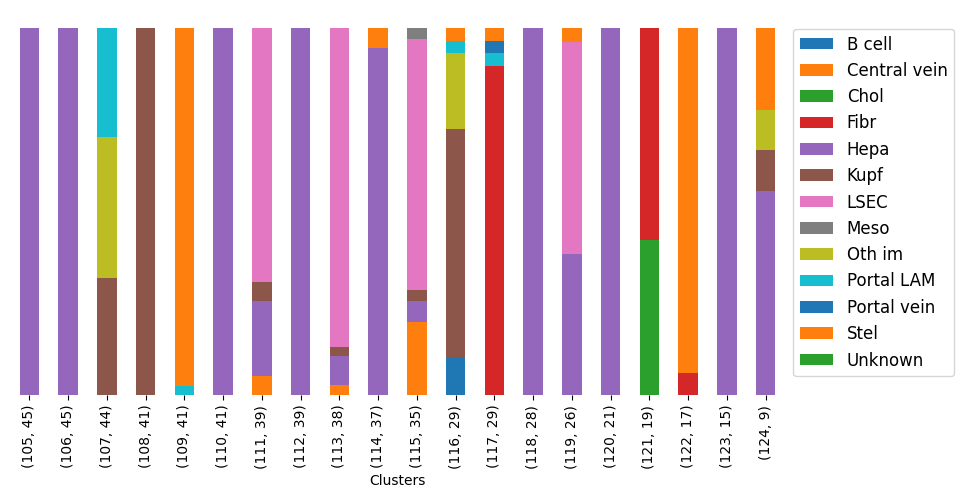

In [11]:
cell_types = ['Hepa','Kupf','LSEC','Central vein','Portal vein','Fibr','Stel','Meso','Chol','B cell','Oth im','Unknown','Portal LAM']
leiden_clusters_per_ct = clusteringVSleiden(sdata.table, "annotation_own_score_genes", "leiden",cell_types)

In [12]:
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
print(sdata.table.obs['leiden_cell_types'].value_counts())


Hepa            5393
Kupf            1590
LSEC            1468
Stel             693
Unknown          451
Oth im           328
Chol             314
Fibr             291
B cell           277
Portal vein      230
Central vein     113
Portal LAM        91
Name: leiden_cell_types, dtype: int64


91
Summary:
Hepa
Maybe drop:[['Glul', 'Central vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Hgf', 'LSEC'], ['Plpp1', 'Central vein'], ['Fn1', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein'], ['Lpl', 'Fibr']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein'], ['Pecam1', 'B cell'], ['Fcgr1', 'Portal LAM']]
LSEC
Maybe drop:[['Sirpa', 'Kupf'], ['Adgrg6', 'Chol'], ['Sirpa', 'Portal LAM']]
Central vein
Maybe drop:[['Cd9', 'Portal vein'], ['Cd9', 'Chol']]
Oth im
Maybe drop:[['Cd9', 'Central vein'], ['Cd9', 'Portal vein'], ['Cd9', 'Chol']]
Portal LAM
Maybe drop:[['Cd9', 'Central vein'], ['Cd9', 'Portal vein'], ['Spp1', 'Chol'], ['Cd9', 'Chol']]
Summary:
Hepa
Maybe drop:[['Glul', 'Central vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Hgf', 'LSEC'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein'], ['Fn1', 'Stel'], ['Fn1', 'Chol']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Central vein'], ['P

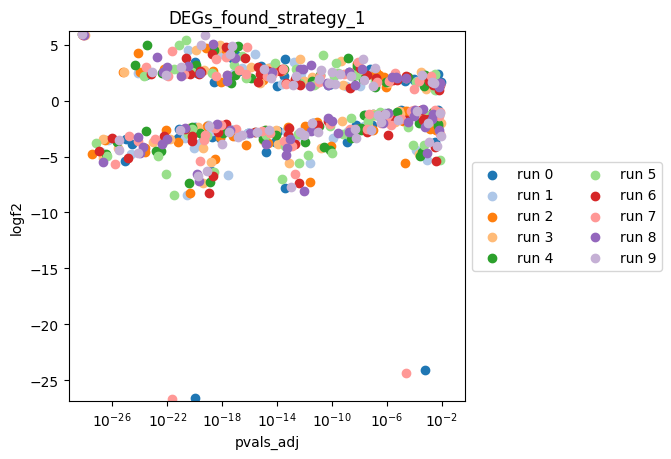

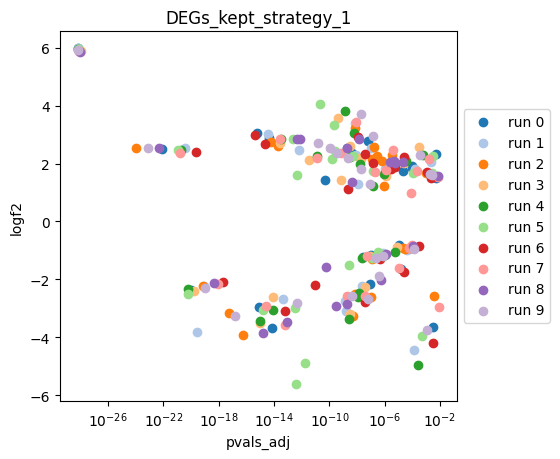

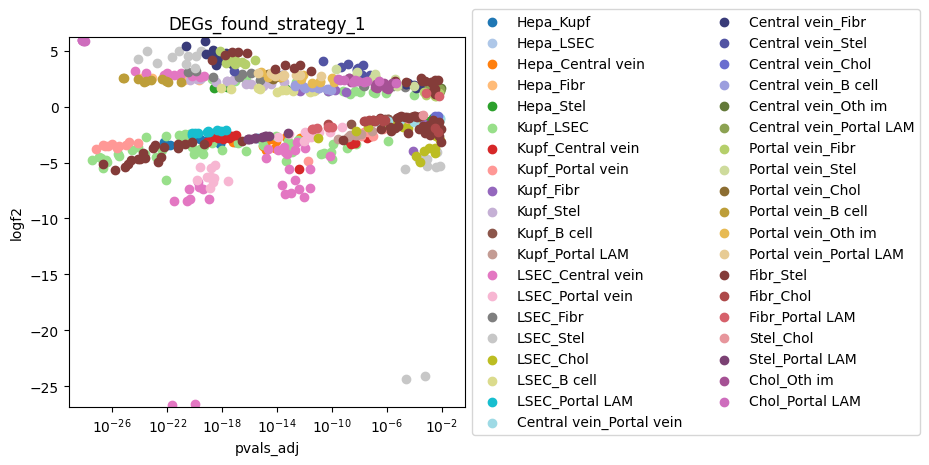

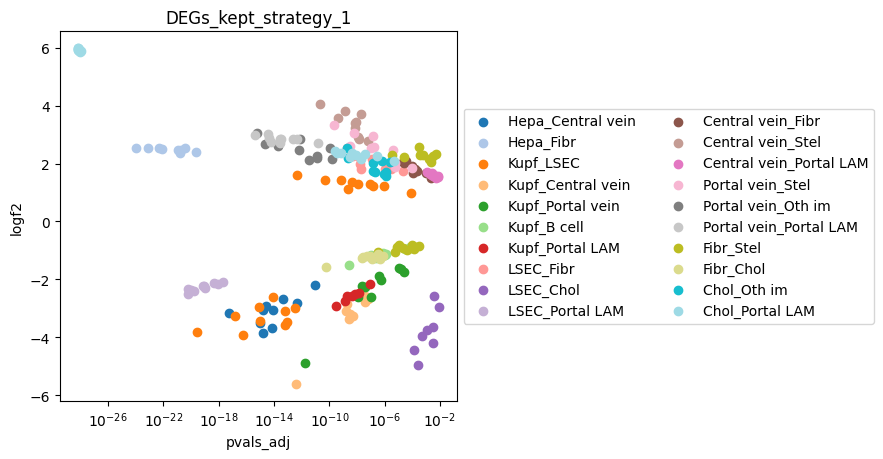

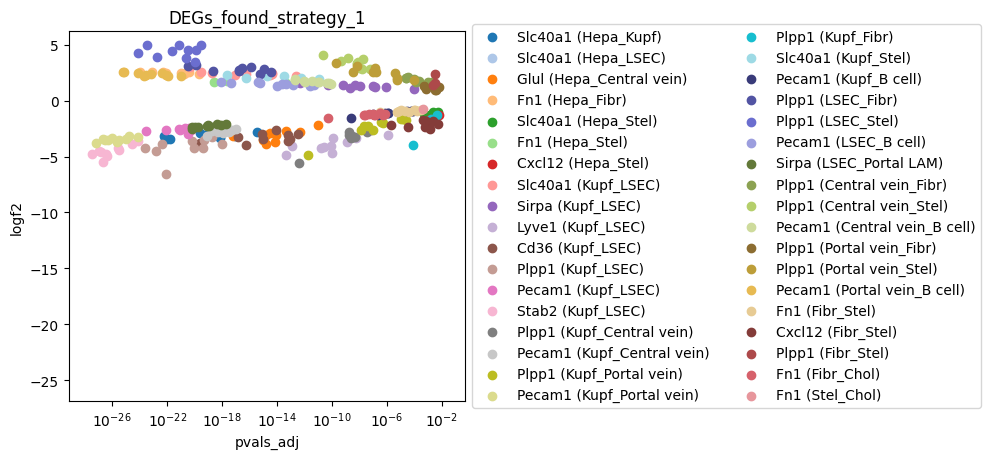

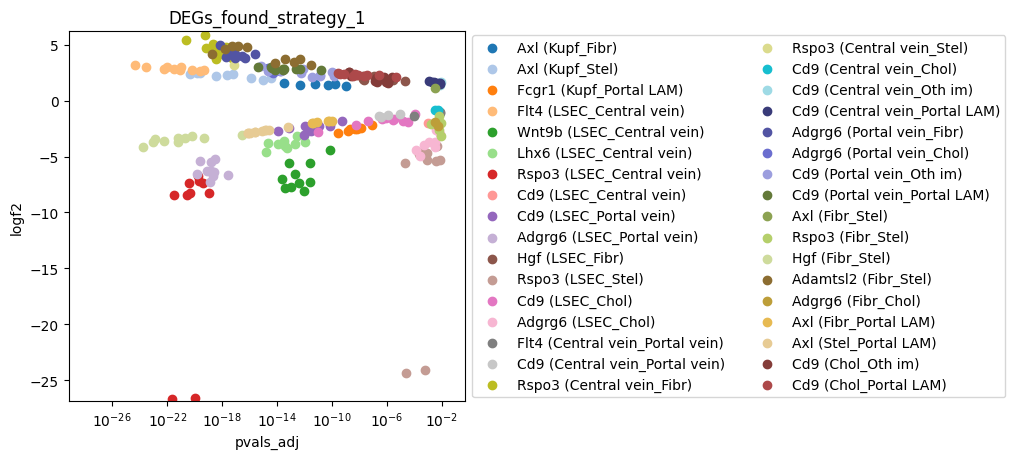

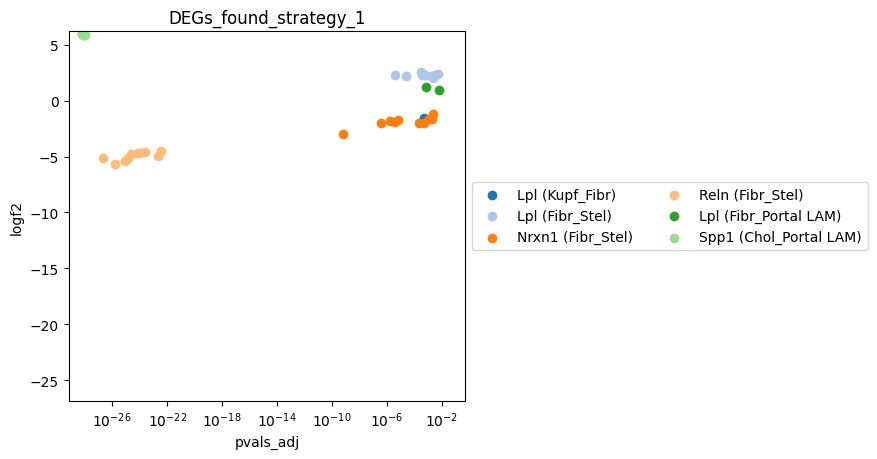

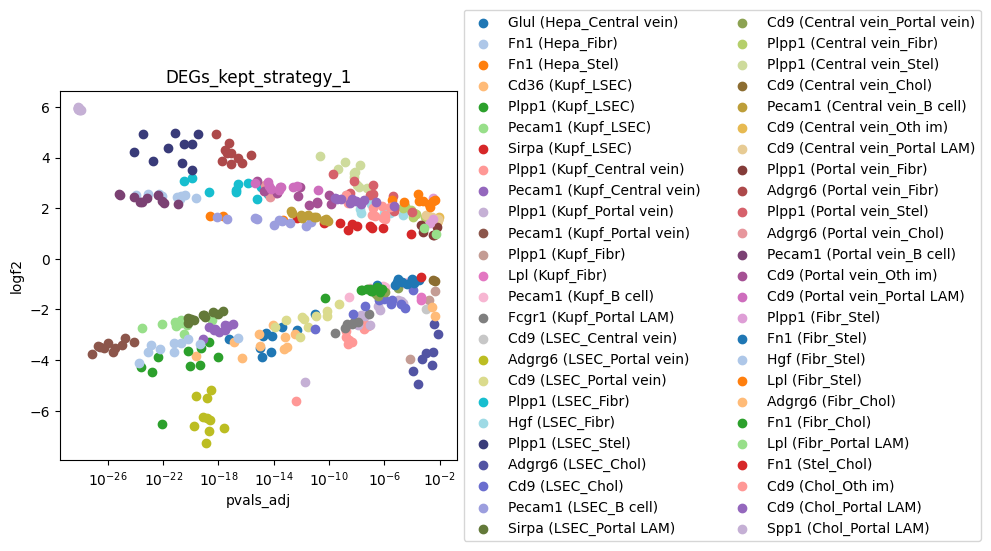

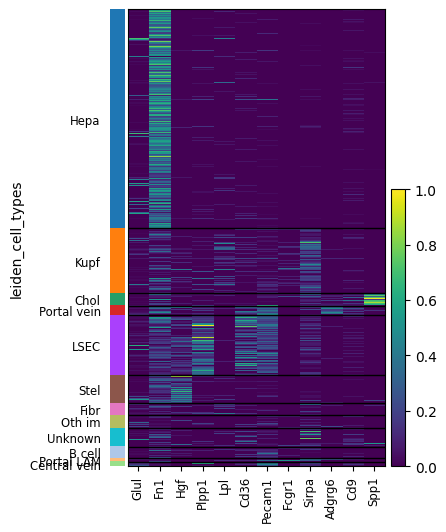

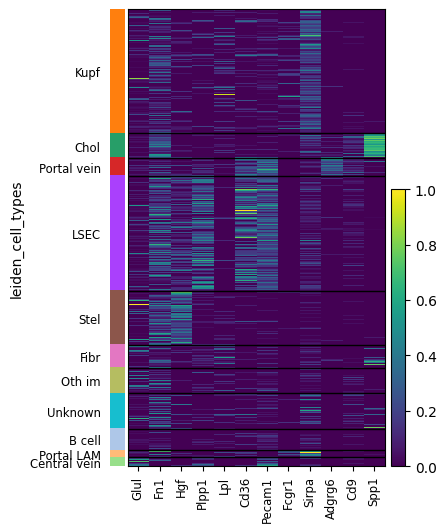

In [13]:
# STRATEGY 1 to change the marker gene list
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,1,OUTPUT_DIR)

91
Ccr2
Is marker gene of: ['Portal LAM']
Could also be a marker gene of: ['Oth im']
Cd36
Is marker gene of: ['LSEC', 'Kupf']
Could also be a marker gene of: ['Portal vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Oth im']
Cd5l
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['B cell']
Clec4f
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['B cell']
Clec9a
Is marker gene of: []
Could also be a marker gene of: ['Kupf', 'LSEC', 'Portal LAM']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Portal LAM']
Cyp2e1
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['LSEC', 'Central vein', 'Stel']
Dpt
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Chol', 'Portal LAM']
F13a1
Is marker gene of: []
Could also be a marker gene of: ['Portal LAM']
Itgax
Is marker gene of: ['Oth im']
Could also be a marker gene of: ['Portal LAM']
Itgb7
Is marker gene of: ['B cell', 'Oth im']
Could also be a marker gene of: ['Por

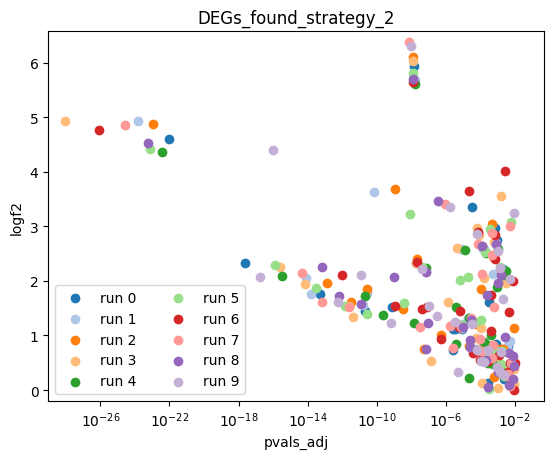

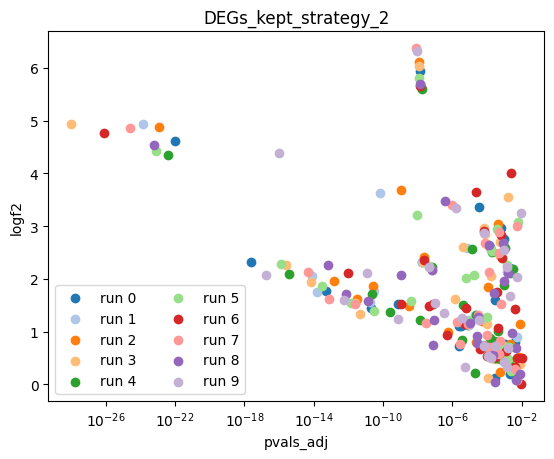

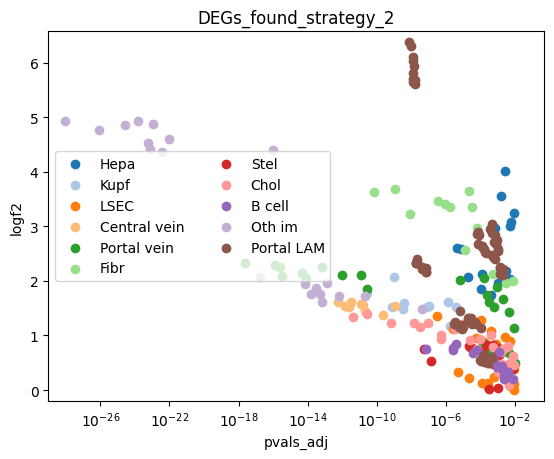

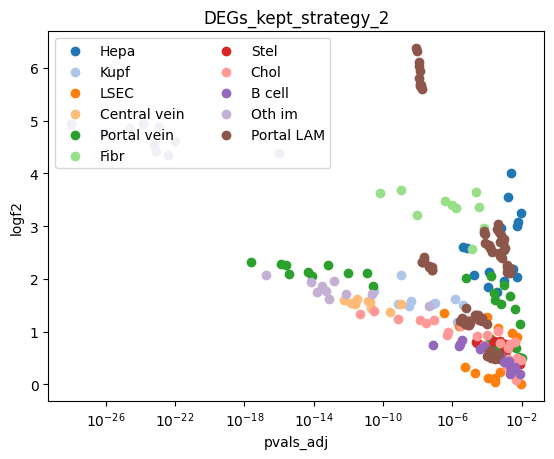

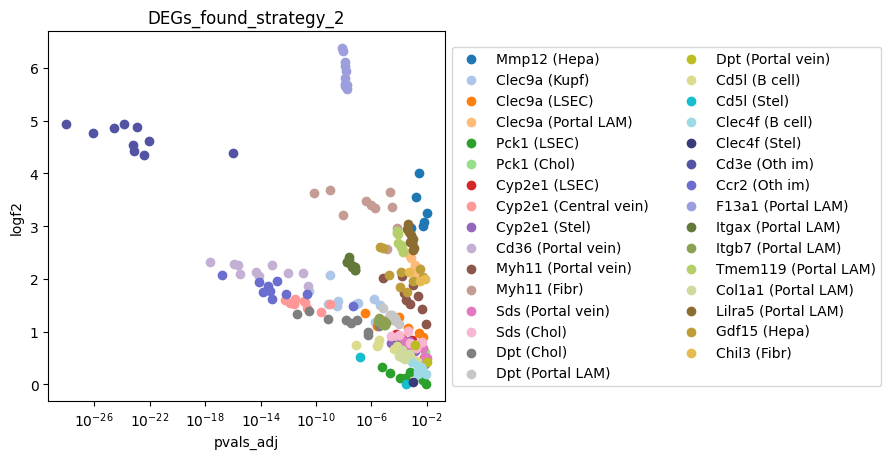

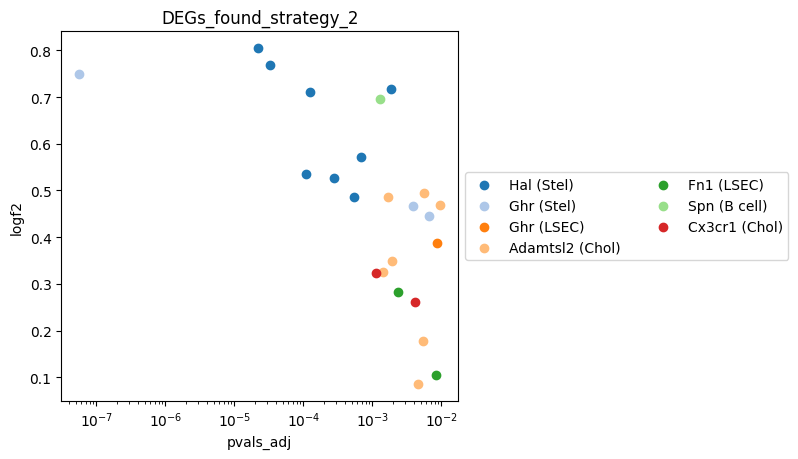

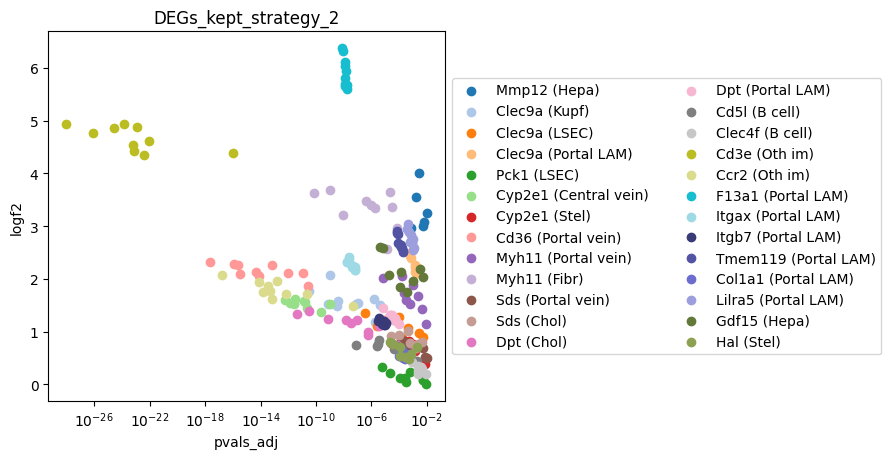

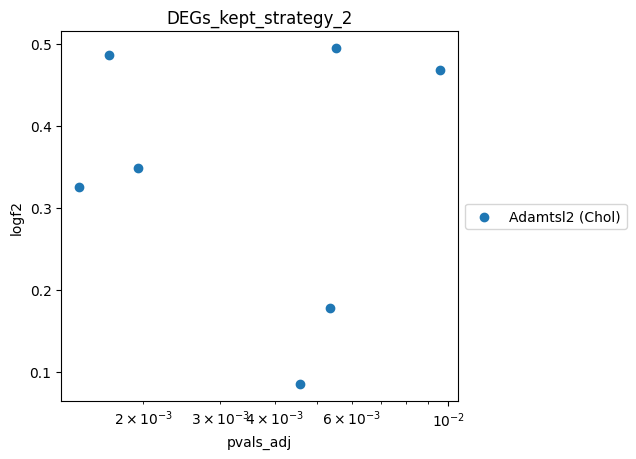

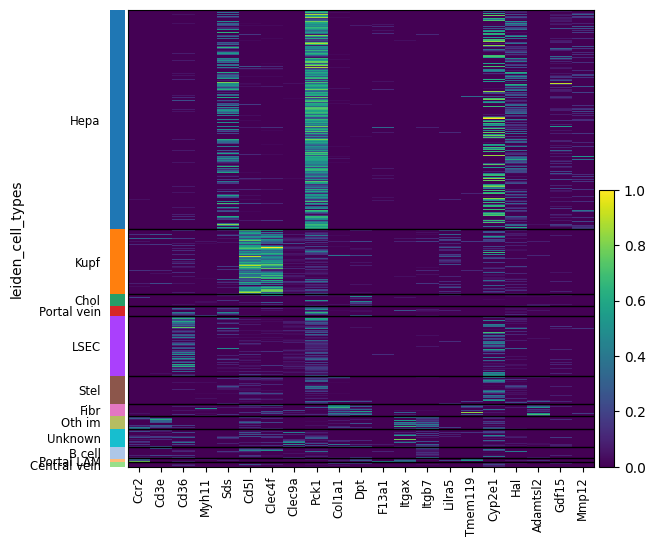

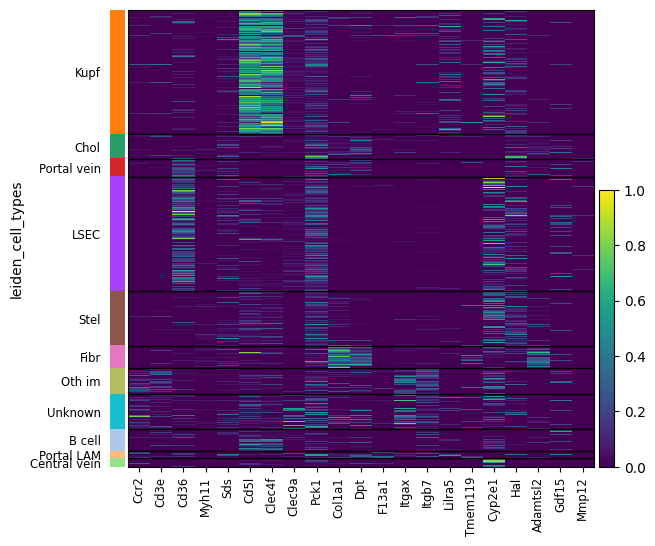

In [24]:
# STRATEGY 2 to change the marker gene list
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,2,OUTPUT_DIR)

In [15]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
path_mg_mod_1_2 = OUTPUT_DIR + "/markerGeneListHL_othIm_endoSplit_portalLAM_modified_1_2.csv"
df_mg.to_csv(path_mg_mod_1_2)

Hepa             9.002
LSEC            10.833
Portal vein      9.000
Central vein     9.500
Chol             9.500
Kupf            18.000
Stel            17.001
Fibr            16.500
B cell           6.500
Meso             6.000
Portal LAM      19.500
Oth im           5.000
dtype: float64


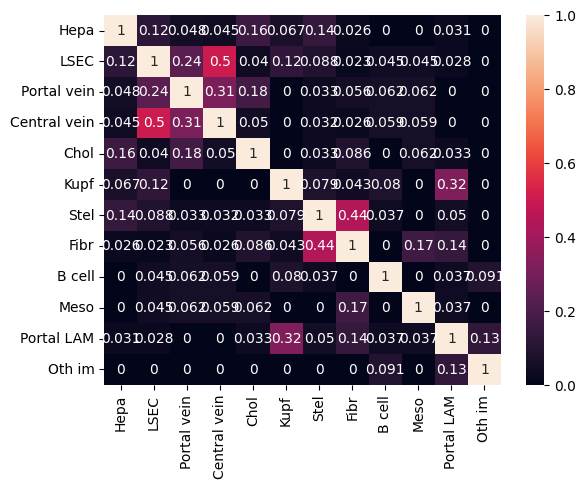

In [16]:
Jaccard_similarity_matrix(path_mg_mod_1_2)

Hepa            49.506184
LSEC            14.013702
Kupf            12.945992
Stel             6.717680
Oth im           4.199662
Chol             2.793843
Fibr             2.615891
B cell           2.589198
Portal vein      1.788415
Portal LAM       1.521488
Central vein     1.112199
Meso             0.177952
Unknown          0.017795
Name: annotation_own_score_genes_strat_1_2, dtype: float64


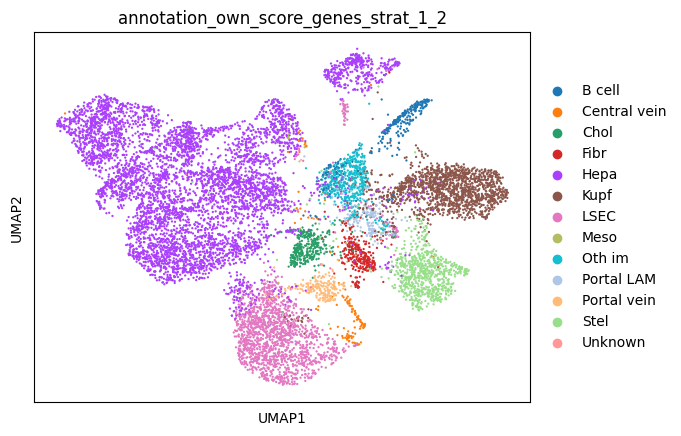

5.258474953287659


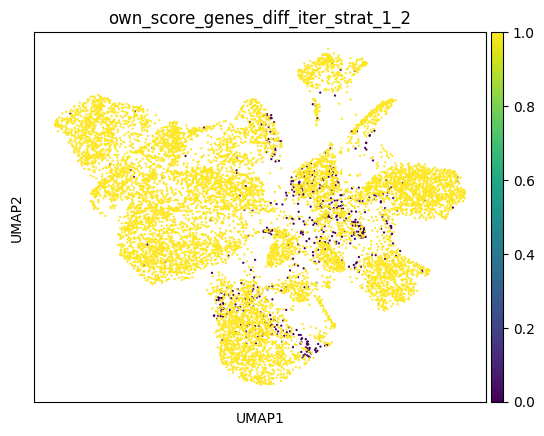

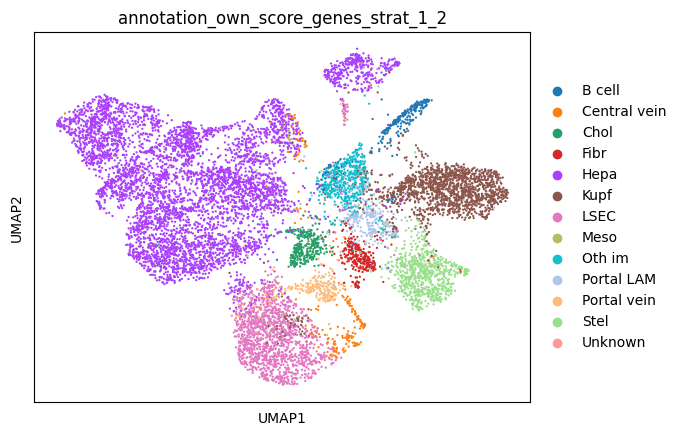

Hepa            47.815642
Kupf            13.711184
LSEC            12.634576
Stel             6.655396
Oth im           4.315331
Chol             2.793843
Portal LAM       2.749355
Fibr             2.518018
B cell           2.402349
Portal vein      2.322271
Central vein     1.815108
Meso             0.249132
Unknown          0.017795
Name: annotation_own_score_genes_strat_1_2, dtype: float64
1.112198594180977


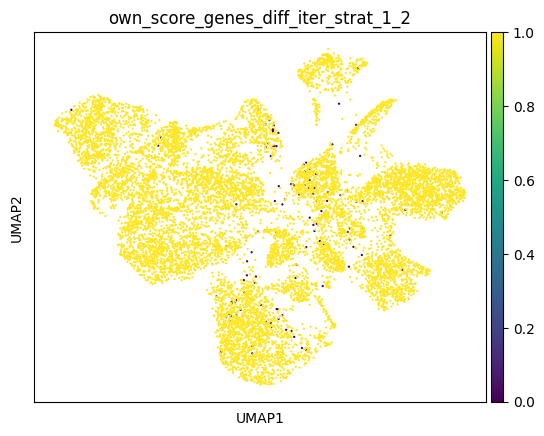

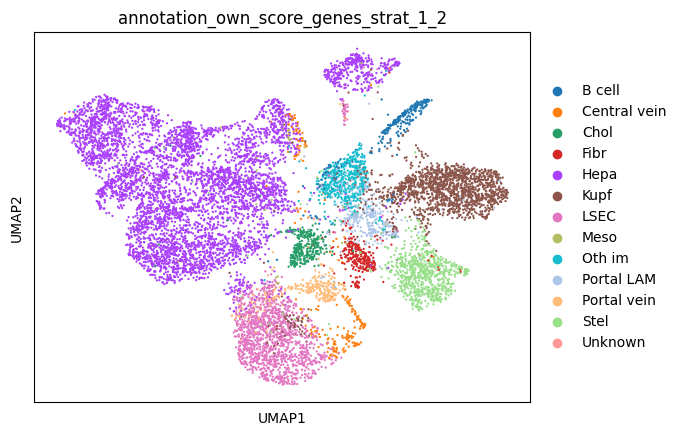

Hepa            47.450841
Kupf            13.711184
LSEC            12.323160
Stel             6.664294
Oth im           4.270843
Portal LAM       3.060771
Chol             2.811638
Fibr             2.526915
Portal vein      2.437939
B cell           2.375656
Central vein     2.046445
Meso             0.302518
Unknown          0.017795
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.24913248509653885


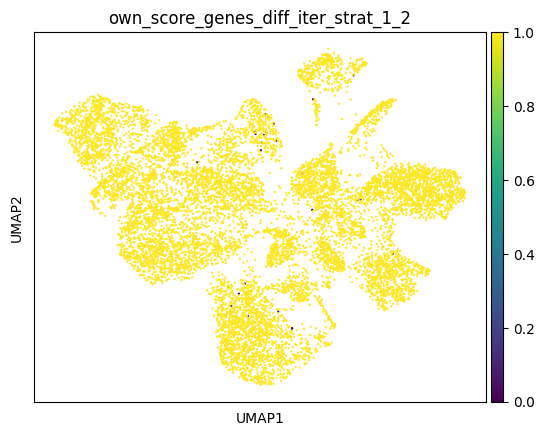

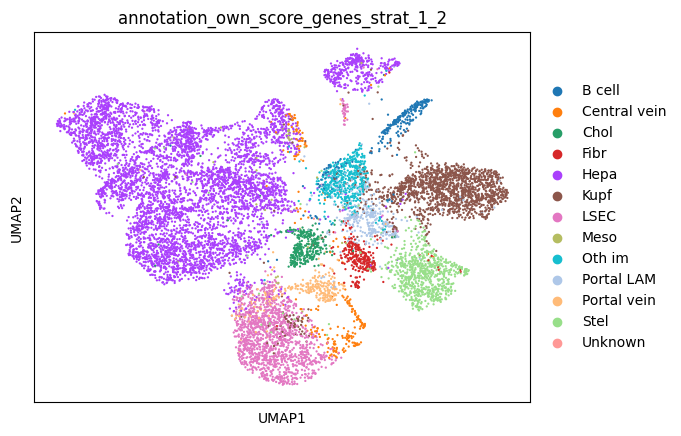

Hepa            47.308479
Kupf            13.728979
LSEC            12.278672
Stel             6.664294
Oth im           4.288638
Portal LAM       3.069668
Chol             2.811638
Fibr             2.518018
Portal vein      2.473530
B cell           2.348963
Central vein     2.135421
Meso             0.355904
Unknown          0.017795
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.08007829878103034


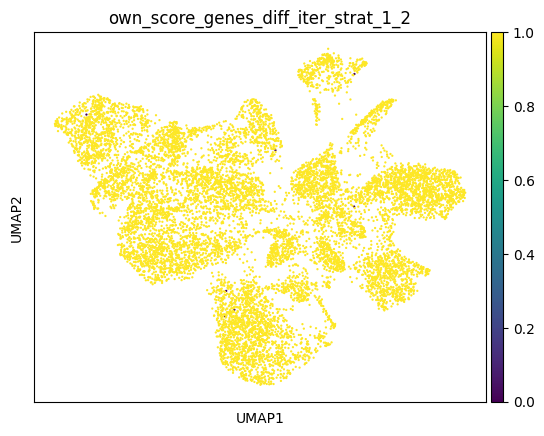

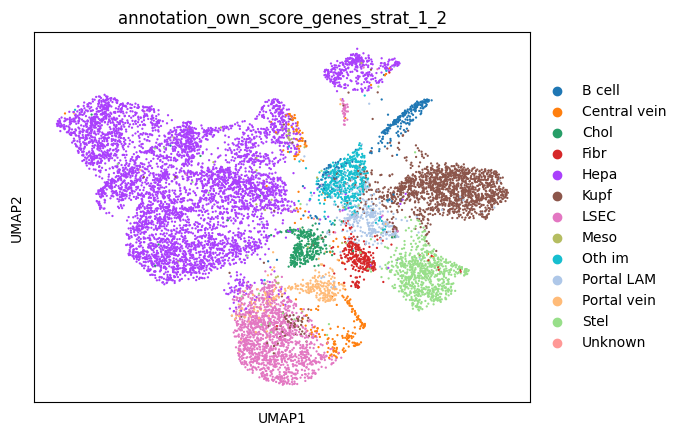

Hepa            47.255094
Kupf            13.737877
LSEC            12.269775
Stel             6.664294
Oth im           4.288638
Portal LAM       3.060771
Chol             2.829433
Fibr             2.526915
Portal vein      2.500222
B cell           2.348963
Central vein     2.144319
Meso             0.355904
Unknown          0.017795
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.0
converged


Hepa      LSEC  Portal vein  Central vein       Chol      Kupf  \
0     -0.452787  4.960516    -0.018889      0.588939  -0.999110 -2.223866   
1      4.554073       NaN    -3.447957           NaN   0.305412       NaN   
2      5.992206 -0.483299          NaN     -1.564368  -0.242321       NaN   
3           NaN       NaN          NaN           NaN        NaN  6.276423   
4           NaN -1.015118    -0.961153     -3.441610        NaN -4.901971   
...         ...       ...          ...           ...        ...       ...   
11234  3.160986       NaN    -0.357533     -2.422165  21.908923 -2.816261   
11235  0.847577       NaN    -3.903296           NaN  -2.770071  7.719606   
11236  9.523800 -1.946474    -3.291127           NaN   2.692112       NaN   
11237  3.136051  8.463529    11.648724      0.256156   4.376771 -0.120679   
11238  7.878618 -2.403404    -1.605592           NaN   1.715827       NaN   

            Stel       Fibr    B cell      Meso  Portal LAM  Oth im  
0      -1.162341        NaN -2.288918       NaN   -5.755031     NaN  
1      -3.500818        NaN       NaN       NaN         NaN     NaN  
2            NaN        NaN       NaN       NaN         NaN     NaN  
3      -3.950790        NaN  2.041329       NaN   -1.689285     NaN  
4            NaN  -6.029582 -2.180089       NaN   -6.647977     NaN  
...          ...        ...       ...       ...         ...     ...  
11234  -2.089415   6.629604       NaN  4.174031    7.648025     NaN  
11235  10.283596  22.939892 -1.686598  1.154686    6.982920     NaN  
11236   2.233016  -4.605781       NaN       NaN         NaN     NaN  
11237   0.928307  -5.412163 -1.116445 -1.175146   -4.676462     NaN  
11238  -4.152231        NaN       NaN       NaN   -4.576656     NaN  

[11239 rows x 12 columns]

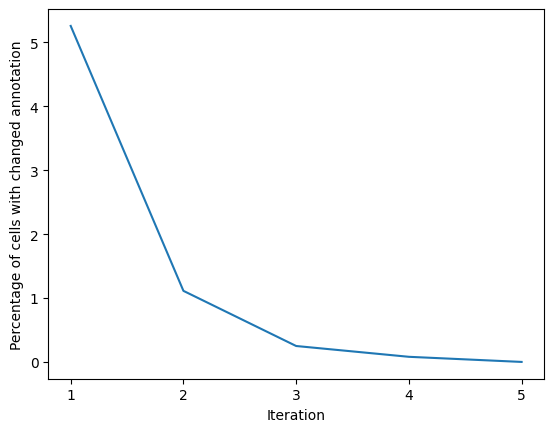

In [17]:
# Own score genes iterative with basic marker gene list updated with strategy 1 and 2
own_score_genes_iterative(sdata.table,path_mg_mod_1_2,nr_iterations=8,suffix='_strat_1_2',output_dir=OUTPUT_DIR)

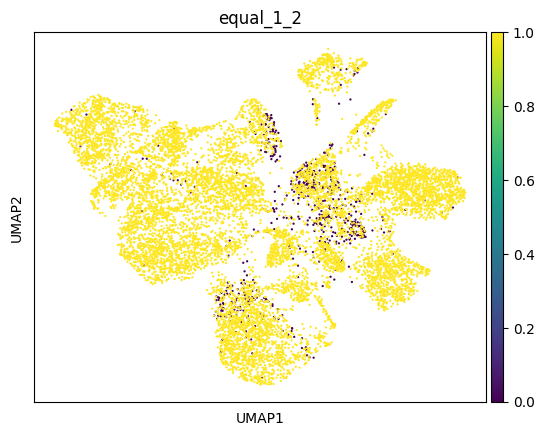

In [18]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

In [19]:
sdata.table.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'annotation_score_genes_25', 'cleanliness_score_genes_25',
       'score_celltype_own_score_genes',
       'second_score_celltype_own_score_genes', 'cleanliness_own_score_genes',
       'annotation_own_score_genes_start_iterative',
       'annotation_own_score_genes', 'count_density', 'leiden_cell_types',
       'score_celltype_own_score_genes_strat_1_2',
       'second_score_celltype_own_score_genes_strat_1_2',
       'cleanliness_own_score_genes_strat_1_2',
       'annotation_own_score_genes_start_iterative_strat_1_2',
       'annotation_own_score_genes_strat_1_2', 'equal_1_2'],
      dtype='object')

In [20]:
sdata.table.write_h5ad(OUTPUT_DIR+'/'+name_anndata+'_it_score_genes.h5ad')